# Problem Statement

Delhiverey is a supply chain management company dealing with health commodities. Our dataset provides commodity pricing and supply chain expense necessary to move the commodity to countries for use. The dataset mainly focuses on the Antiretroviral (ARV) and HRDT lab shipments to different countries the pricing for different countries. It also provides data’s such as shipment mode, scheduled, delivered date and details about the product such as brand, dosage, dosage form, weight etc. Our goal is to predict the effective supply chain management using the data in dataset by logistics.

The source of Datset:

columns describtion

1	ID:	Primary key indentifer of the line of data in our analytical tool

2	Project Code:	Project code	Only includes PEPFAR project codes

3	PQ #	:"Pre-PQ Process" indicates deliveries that occurred before the PQ process was put in place in mid-2009.

4	PO / SO #: Purchase order (PO) for Direct Drop deliveries, or Sales Order (SO) for from Regional Delivery Center (RDC) deliveries	PO # is not applicable for from RDC deliveries ("NA - From RDC")

5	ASN/DN #: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery Note (DN) for from RDC deliveries

6	Country:	Destination country	

7	Managed By	: either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office

8	Fulfill Via: via Direct Drop from vendor or from stock available in the RDCs

9	Vendor INCO Term:	The vendor INCO term (also known as International Commercial Terms) for Direct Drop deliveries	Not applicable for from RDC deliveries ("NA - From RDC")	

10	Shipment Mode:	Method by which commodities are shipped	

11	PQ First Sent to Client Date	Date the PQ is first sent to the client	"Pre-PQ Process" indicates deliveries that occurred before the PQ process was put in place in mid-2009.  "Date Not Captured" where date was not captured.

12	PO Sent to Vendor Date	Date the PO is first sent to the vendor	Not applicable for from RDC deliveries ("NA - From RDC"). "Date Not Captured" where date was not captured.

13	Scheduled Delivery Date	Current anticipated delivery date	This date is not equivalent to the client promised delivery date and should not be used to determine on-time perform.

14	Delivered to Client Date	Date of delivery to client	Transactions are included in the dataset only after the goods have been delivered to the client	

15	Delivery Recorded Date	Date on which delivery to client was recorded in SCMS information systems	This date is used for official SCMS reporting. Deliveries are only recorded in SCMS systems once all necessary documentation has been received. Due to documentation delays there can be a lag between the time goods are physically delivered to the client and the date on which all necessary documentation has been received.

16	Product Group	Product group for item, i.e. ARV, HRDT	ACT, ANTM, ARV, HRDT, MRDT only	

17	Sub Classification	Identifies relevant product sub classifications, such as whether ARVs are pediatric or adult, whether a malaria product is an artemisinin-based combination therapy (ACT), etc.	

18	Vendor	Vendor name	SCMS is the vendor for from RDC deliveries (product can be from multiple manufacturers, based on available stock)	

19	Item Description	Product name and formulation from Partnership for Supply Chain Management (PFSCM) Item Master

20	Molecule/Test Type	Active drug(s) or test kit type	

21	Brand	Generic or branded name for the item

22	Dosage	Item dosage and unit	

23	Dosage Form	Dosage form for the item (tablet, oral solution, injection, etc.). 	"FDC" denotes if the item contains a fixed-
dose combination (FDC) formulation. "Blister" denotes if the item is presented in blister packaging. "Co-blister" denotes when the item contains more than one product packaged together in blister packaging.	

24	Unit of Measure (Per Pack)	Pack quantity (pills or test kits) used to compute unit price

25	Line Item Quantity	Total quantity (packs) of commodity per line item	

26	Line Item Value	Total value of commodity per line item	

27	Pack Price	Cost per pack (i.e. month's supply of ARVs, pack of 60 test kits)	

28	Unit Price	Cost per pill (for drugs) or per test (for test kits)		

29	Manufacturing Site	Identifies manufacturing site for the line item for direct drop and from RDC deliveries	

30	First Line Designation	Designates if the line in question shows the aggregated freight costs and weight associated with all items on the ASN/DN 	There may or may not be other associated lines with each ASN/DN	

31	Weight (Kilograms)	Weight for all lines on an ASN/DN	Present only for FirstLine designated lines

32	Freight Cost (USD)	Freight charges associated with all lines on the respective ASN/DN	Present only for FirstLine designated lines. For C- and D-vendor INCO term deliveries, freight costs may be included in the unit price for the commodities as indicated by "Freight Included in Commodity Price". All other lines are "Invoiced Separately"	

33	Line Item Insurance (USD)	Line item cost of insurance, created by applying an annual flat rate (%) to commodity cost	Pre 6/1/2009 lines are still under analysis for correct rates because they do not have PQs and cannot be computed in the same way that they currently are across the partnership	

# Importing Important libraries

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis 

In [2]:
#reading dataset
df=pd.read_csv(r'C:\Users\HP\Desktop\DSA\final project\SCMS_Delivery_History_Dataset.csv\SCMS_Delivery_History_Dataset.csv')

In [4]:
pd.set_option('display.max_columns',None)
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [14]:
df.shape

(10324, 33)

In [5]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

we found that we hsve missng values in Shipment Mode,Dosage,Line Item Insurance

In [7]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


# Data Analysis

In [8]:
#checking for null values
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [9]:
[features for features in df.columns if df[features].isna().sum()>0]

['Shipment Mode', 'Dosage', 'Line Item Insurance (USD)']

we found that we hsve missng values in Shipment Mode,Dosage,Line Item Insurance

In [10]:
#Explore about numerical variables
df.groupby(['Unit of Measure (Per Pack)','Line Item Quantity','Line Item Value','Pack Price','Unit Price']).size().reset_index()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,0
0,1,2,477.3,238.65,238.65,1
1,1,13,11.7,0.90,0.90,2
2,1,15,75.0,5.00,5.00,2
3,1,20,100.0,5.00,5.00,2
4,1,20,460.0,23.00,23.00,1
...,...,...,...,...,...,...
9279,1000,720,16164.0,22.45,0.02,1
9280,1000,1070,25680.0,24.00,0.02,1
9281,1000,1370,37401.0,27.30,0.03,1
9282,1000,3000,27750.0,9.25,0.01,1


In [11]:
#explore categorical variables(Top 5 counties)
country_name=df.Country.value_counts().index
country_val=df.Country.value_counts().values
print(country_name[:5])

Index(['South Africa', 'Nigeria', 'Côte d'Ivoire', 'Uganda', 'Vietnam'], dtype='object')


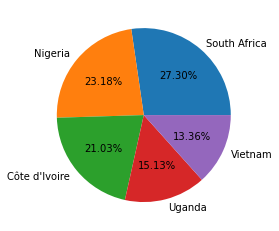

In [32]:
plt.pie(country_val[:5],labels=country_name[:5],autopct='%1.2f%%')
plt.show()

In [16]:
#finding relationship b/w features
#checking relation b/w countries and managed by
pd.crosstab(df['Country'],df['Managed By'])

Managed By,Ethiopia Field Office,Haiti Field Office,PMO - US,South Africa Field Office
Country,,,,
Afghanistan,0,0,3,0
Angola,0,0,7,0
Belize,0,0,1,0
Benin,0,0,13,0
Botswana,0,0,70,0
Burkina Faso,0,0,2,0
Burundi,0,0,98,0
Cameroon,0,0,75,0
"Congo, DRC",0,0,333,0


in most countries supply chain is managed by PMO - US

In [26]:
#outlier detection
for column in df.columns:
    print(column,df[column].nunique())

ID 10324
Project Code 142
PQ # 1237
PO / SO # 6233
ASN/DN # 7030
Country 43
Managed By 4
Fulfill Via 2
Vendor INCO Term 8
Shipment Mode 4
PQ First Sent to Client Date 765
PO Sent to Vendor Date 897
Scheduled Delivery Date 2006
Delivered to Client Date 2093
Delivery Recorded Date 2042
Product Group 5
Sub Classification 6
Vendor 73
Item Description 184
Molecule/Test Type 86
Brand 48
Dosage 54
Dosage Form 17
Unit of Measure (Per Pack) 31
Line Item Quantity 5065
Line Item Value 8741
Pack Price 1175
Unit Price 183
Manufacturing Site 88
First Line Designation 2
Weight (Kilograms) 4688
Freight Cost (USD) 6733
Line Item Insurance (USD) 6722


There is no column with single value

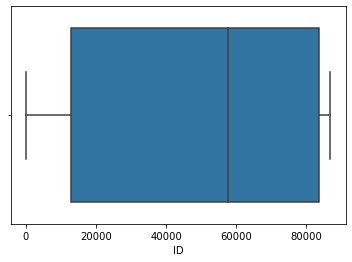

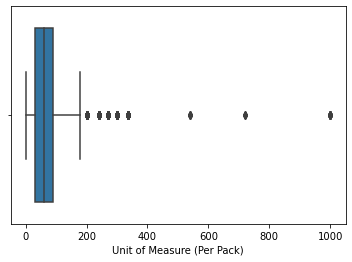

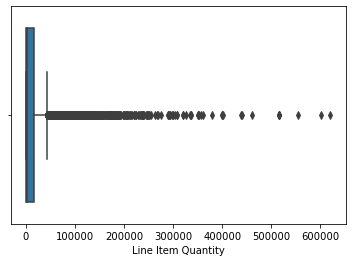

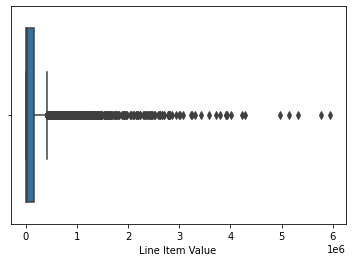

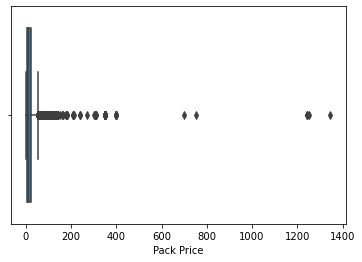

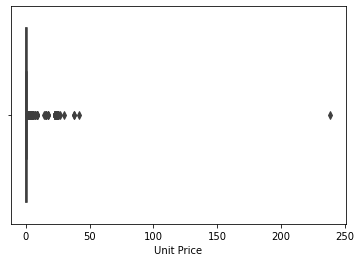

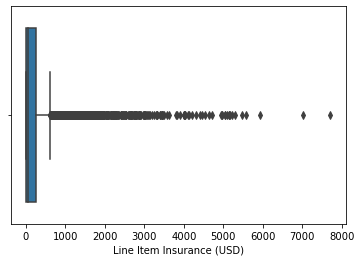

In [33]:
num=df.select_dtypes(include=[np.float64,np.int64])
for i in num:
    sns.boxplot(df[i])
    plt.show()

Therefore we found that there are outliers so we need to perform outlier handling